In [1]:
using Pkg
Pkg.add("ImageSegmentation")
Pkg.add("Images")

  Updating registry at `~/.julia/registries/General`
  Updating git-repo `https://github.com/JuliaRegistries/General.git`
Fetching: [========================================>]  100.0 %.0 %]  43.6 % [====================================>    ]  87.6 % Resolving package versions...
 Installed SortingAlgorithms ───────── v0.3.1
 Installed ImageSegmentation ───────── v1.0.1
 Installed FixedPointNumbers ───────── v0.5.3
 Installed Images ──────────────────── v0.16.1
 Installed SpecialFunctions ────────── v0.7.2
 Installed ImageAxes ───────────────── v0.5.0
 Installed SIUnits ─────────────────── v0.1.0
 Installed IdentityRanges ──────────── v0.2.0
 Installed ComputationalResources ──── v0.3.0
 Installed ImageTransformations ────── v0.6.0
 Installed WoodburyMatrices ────────── v0.4.1
 Installed SimpleTraits ────────────── v0.8.0
 Installed AxisArrays ──────────────── v0.3.0
 Installed ImageCore ───────────────── v0.7.3
 Installed MappedArrays ────────────── v0.2.1
 Installed RegionTrees ──────

  Building SpecialFunctions → `~/.julia/packages/SpecialFunctions/fvheQ/deps/build.log`
  Building FFTW ────────────→ `~/.julia/packages/FFTW/p7sLQ/deps/build.log`
  Building MbedTLS ─────────→ `~/.julia/packages/MbedTLS/eaAxb/deps/build.log`


In [10]:
Pkg.add("QuartzImageIO")

 Resolving package versions...
 Installed QuartzImageIO ─ v0.5.0
  Updating `~/.julia/environments/v1.0/Project.toml`
  [dca85d43] + QuartzImageIO v0.5.0
  Updating `~/.julia/environments/v1.0/Manifest.toml`
  [dca85d43] + QuartzImageIO v0.5.0


In [11]:
using QuartzImageIO

┌ Info: Precompiling QuartzImageIO [dca85d43-d64c-5e67-8c65-017450d5d020]
└ @ Base loading.jl:1189


In [12]:
using Images, ImageSegmentation

In [2]:
# save("nuclei.png",nuclei)

UndefVarError: UndefVarError: save not defined

In [8]:
using Images, ImageSegmentation

In [14]:
Pkg.add("ImageMagick")
using ImageMagick

 Resolving package versions...
 Installed ImageMagick ─ v0.7.1
  Updating `~/.julia/environments/v1.0/Project.toml`
  [6218d12a] + ImageMagick v0.7.1
  Updating `~/.julia/environments/v1.0/Manifest.toml`
  [6218d12a] + ImageMagick v0.7.1
  Building ImageMagick → `~/.julia/packages/ImageMagick/d5KBL/deps/build.log`


┌ Info: Precompiling ImageMagick [6218d12a-5da1-5696-b52f-db25d2ecc6d1]
└ @ Base loading.jl:1189


In [13]:
img = load("M08B_DAPI_mito_training/images/20X_c0_A1_Site-0.max.tif")

All errors:
   UndefVarError

Errors encountered while loading "M08B_DAPI_mito_training/images/20X_c0_A1_Site-0.max.tif".


(:warn)
   ArgumentError("Package ImageMagick not found in current path:\n- Run `import Pkg; Pkg.add(\"ImageMagick\")` to install the ImageMagick package.\n")


Fatal error:


UndefVarError: UndefVarError: warn not defined

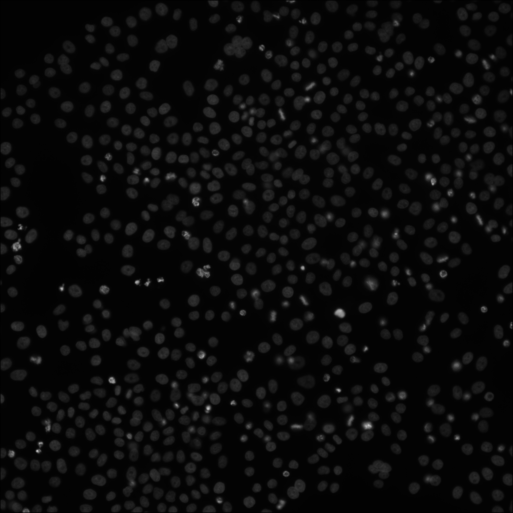

In [16]:
nuclei = img[:,:,1]

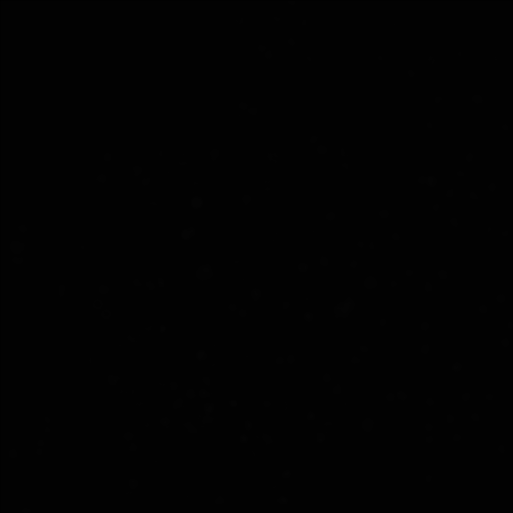

In [65]:
cells = img[:,:,2]

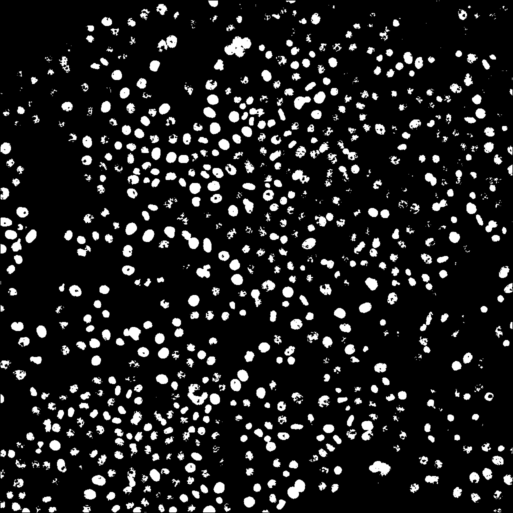

In [173]:
### threshold and view results

farr = convert(Array{Float64},channelview(nuclei))

thresh_nuc = .09000
mask = farr .< thresh_nuc
farr[mask] .= 0
mask2 = farr .>= thresh_nuc
farr[mask2] .= 1

Gray.(farr)

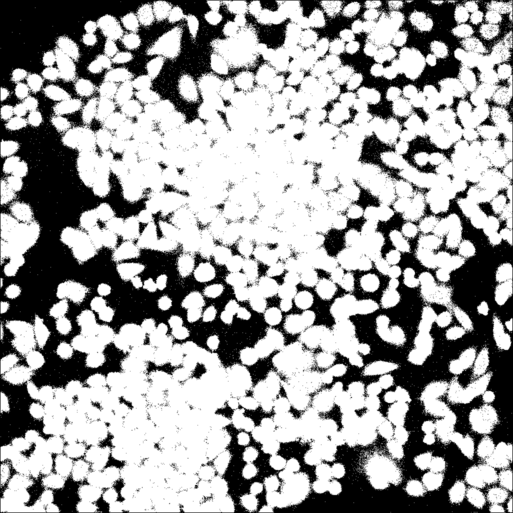

In [174]:
### threshold and view results

farr = convert(Array{Float64},channelview(cells))

thresh_cells = .00690
mask = farr .< thresh_cells
farr[mask] .= 0
mask2 = farr .>= thresh_cells
farr[mask2] .= 1

Gray.(farr)

In [74]:
bw_nuc = Gray.(nuclei) .> thresh_nuc;
bw_cells = Gray.(cells) .> thresh_cells;

In [78]:
using ImageView
dist_cells = distance_transform(feature_transform(bw_cells));
imshow(dist_cells)

Dict{String,Any} with 4 entries:
  "gui"         => Dict{String,Any}("window"=>GtkWindowLeaf(name="", parent, wi…
  "roi"         => Dict{String,Any}("redraw"=>846: "map(clim-mapped image, inpu…
  "annotations" => 812: "input-266" = Dict{UInt64,Any}() Dict{UInt64,Any} 
  "clim"        => 811: "CLim" = CLim{Float64}(0.0, 138.95682782792647) CLim{Fl…

In [79]:
dist_nuc = distance_transform(feature_transform(bw_nuc));
imshow(dist_nuc)

Dict{String,Any} with 4 entries:
  "gui"         => Dict{String,Any}("window"=>GtkWindowLeaf(name="", parent, wi…
  "roi"         => Dict{String,Any}("redraw"=>883: "map(clim-mapped image, inpu…
  "annotations" => 849: "input-278" = Dict{UInt64,Any}() Dict{UInt64,Any} 
  "clim"        => 848: "CLim" = CLim{Float64}(0.0, 142.76203977248295) CLim{Fl…

In [82]:
markers = label_components(dist_nuc .< 2);
imshow(markers)

Dict{String,Any} with 4 entries:
  "gui"         => Dict{String,Any}("window"=>GtkWindowLeaf(name="", parent, wi…
  "roi"         => Dict{String,Any}("redraw"=>994: "map(clim-mapped image, inpu…
  "annotations" => 960: "input-314" = Dict{UInt64,Any}() Dict{UInt64,Any} 
  "clim"        => 959: "CLim" = CLim{RoundingIntegers.RInt64}(0, 708) CLim{Rou…

In [176]:
segments = watershed(dist_cells, markers)
imshow(labels_map(segments))


Dict{String,Any} with 4 entries:
  "gui"         => Dict{String,Any}("window"=>GtkWindowLeaf(name="", parent, wi…
  "roi"         => Dict{String,Any}("redraw"=>1105: "map(clim-mapped image, inp…
  "annotations" => 1071: "input-350" = Dict{UInt64,Any}() Dict{UInt64,Any} 
  "clim"        => 1070: "CLim" = CLim{RoundingIntegers.RInt64}(1, 708) CLim{Ro…

In [177]:
seg_arr = labels_map(segments)
Gray.(seg_arr./maximum(seg_arr))

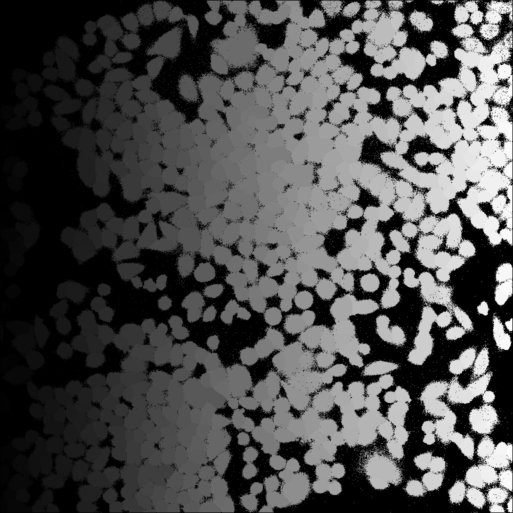

In [178]:
seg_arr = labels_map(segments)
mask = farr .== 0.0
seg_arr[mask] .= 0
seg_arr = seg_arr./maximum(seg_arr).*1 # normalize so no values will be greater than 255
Gray.(seg_arr)

In [183]:
save("small_test/segmented.jpg", Gray. (seg_arr)) 